In [7]:
pip install python-docx pandas

In [9]:
from docx import Document
from docx.shared import Pt
import pandas as pd

# Word dosyasını yükle
doc_path = "input.docx"  # Giriş dosyanızın adını buraya yazın
doc = Document(doc_path)

# Şarkı isimleri ve sözlerini saklamak için listeler
song_names = []
song_lyrics = []

# Geçici değişkenler
current_song_name = None
current_lyrics = []

# Word dosyasındaki paragrafları incele
for paragraph in doc.paragraphs:
    # Şarkı isimlerini bulmak için (bold, italik, font size 18)
    if paragraph.text.strip() and paragraph.runs[0].bold and paragraph.runs[0].italic and paragraph.runs[0].font.size == Pt(18):
        # Önceki şarkı ve sözleri kaydet
        if current_song_name and current_lyrics:
            song_names.append(current_song_name)
            song_lyrics.append("\n".join(current_lyrics))

        # Yeni şarkı ismini al ve sözleri sıfırla
        current_song_name = paragraph.text.strip()
        current_lyrics = []
    else:
        # Şarkı sözleri olan 12 pt metinleri topla
        if paragraph.text.strip() and paragraph.runs[0].font.size == Pt(12):
            current_lyrics.append(paragraph.text.strip())

# Son şarkıyı ekle
if current_song_name and current_lyrics:
    song_names.append(current_song_name)
    song_lyrics.append("\n".join(current_lyrics))

# Şarkı isimleri ve sözlerini içeren bir DataFrame oluştur
df_songs = pd.DataFrame({"Song Name": song_names, "Lyrics": song_lyrics})

# DataFrame'i CSV olarak kaydet
output_csv_path = "song_lyrics_separated.csv"  # Çıktı dosyasının adını burada belirtin
df_songs.to_csv(output_csv_path, index=False)

print(f"CSV dosyası başarıyla kaydedildi: {output_csv_path}")


CSV dosyası başarıyla kaydedildi: song_lyrics_separated.csv


In [10]:
from docx import Document
from docx.shared import Pt
import pandas as pd

# Word dosyasını yükle
doc_path = "input.docx"  # Giriş dosyanızın adını buraya yazın
doc = Document(doc_path)

# Şarkı isimleri ve sözlerini saklamak için listeler
song_names = []
song_lyrics = []

# Geçici değişkenler
current_song_name = None
current_lyrics = []

# Word dosyasındaki paragrafları incele
for paragraph in doc.paragraphs:
    # Şarkı isimlerini bulmak için (font size 18)
    if paragraph.text.strip() and paragraph.runs[0].font.size == Pt(18):
        # Önceki şarkı ve sözleri kaydet
        if current_song_name and current_lyrics:
            song_names.append(current_song_name)
            song_lyrics.append("\n".join(current_lyrics))

        # Yeni şarkı ismini al ve sözleri sıfırla
        current_song_name = paragraph.text.strip()
        current_lyrics = []
    else:
        # Şarkı sözlerini toplamak için (herhangi bir yazı olabilir)
        if paragraph.text.strip():
            current_lyrics.append(paragraph.text.strip())

# Son şarkıyı ekle
if current_song_name and current_lyrics:
    song_names.append(current_song_name)
    song_lyrics.append("\n".join(current_lyrics))

# Şarkı isimleri ve sözlerini içeren bir DataFrame oluştur
df_songs = pd.DataFrame({"Song Name": song_names, "Lyrics": song_lyrics})

# DataFrame'i CSV olarak kaydet
output_csv_path = "song_lyrics_separated.csv"  # Çıktı dosyasının adını burada belirtin
df_songs.to_csv(output_csv_path, index=False)

print(f"CSV dosyası başarıyla kaydedildi: {output_csv_path}")


CSV dosyası başarıyla kaydedildi: song_lyrics_separated.csv


In [11]:
from docx import Document
from docx.shared import Pt
import pandas as pd
import re

# Word dosyasını yükle
doc_path = "input.docx"  # Giriş dosyanızın adını buraya yazın
doc = Document(doc_path)

# Şarkı isimleri ve sözlerini saklamak için listeler
song_names = []
song_lyrics = []

# Geçici değişkenler
current_song_name = None
current_lyrics = []

# Word dosyasındaki paragrafları incele
for paragraph in doc.paragraphs:
    # Şarkı isimlerini bulmak için (font size 18)
    if paragraph.text.strip() and paragraph.runs[0].font.size == Pt(18):
        # Önceki şarkı ve sözleri kaydet
        if current_song_name and current_lyrics:
            song_names.append(current_song_name)
            song_lyrics.append("\n".join(current_lyrics))

        # Yeni şarkı ismini al ve sözleri sıfırla
        current_song_name = paragraph.text.strip()
        current_lyrics = []
    else:
        # Şarkı sözlerini toplamak için (herhangi bir yazı olabilir)
        if paragraph.text.strip():
            current_lyrics.append(paragraph.text.strip())

# Son şarkıyı ekle
if current_song_name and current_lyrics:
    song_names.append(current_song_name)
    song_lyrics.append("\n".join(current_lyrics))

# Şarkı isimleri ve sözlerini içeren bir DataFrame oluştur ve numara ekle
df_songs = pd.DataFrame({"Number": range(1, len(song_names) + 1), "Song Name": song_names, "Lyrics": song_lyrics})

# Fonksiyon: Şarkı sözlerini büyük harfle başlayan her cümleyi yeni satıra alacak şekilde düzenle
def format_lyrics(lyrics):
    # Büyük harfle başlayan cümleleri yeni satıra alma
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|!)(?=\s+[A-Z])', lyrics)
    formatted_lyrics = "\n".join(sentence.strip() for sentence in sentences if sentence)
    return formatted_lyrics

# Şarkı sözlerini formatlama ve yeni DataFrame'e aktarma
df_songs['Formatted Lyrics'] = df_songs['Lyrics'].apply(format_lyrics)

# DataFrame'i CSV olarak kaydet
output_csv_path = "song_lyrics_formatted.csv"  # Çıktı dosyasının adını burada belirtin
df_songs.to_csv(output_csv_path, index=False)

print(f"CSV dosyası başarıyla kaydedildi: {output_csv_path}")


CSV dosyası başarıyla kaydedildi: song_lyrics_formatted.csv


Analiz Aşaması
En Çok Tekrar Eden Kelimeleri ve Kelime Bulutu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


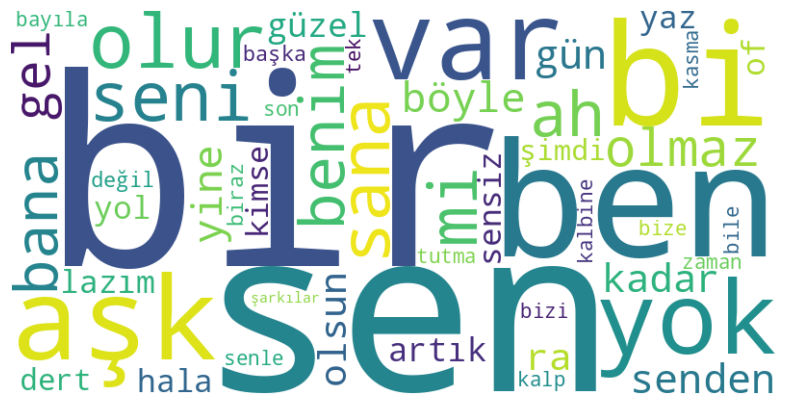

In [12]:
# Gerekli kütüphaneleri yükleyin
!pip install wordcloud matplotlib nltk sklearn

# NLTK stop words'i yüklemek için
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# song_lyrics_formatted.csv dosyasını oku
df_songs = pd.read_csv("song_lyrics_formatted.csv")  # Colab'e yüklediğiniz dosyanın ismi

# Türkçe stop words listesini ayarlayın
turkish_stop_words = stopwords.words('turkish')

# Tüm şarkı sözlerini birleştirin
all_lyrics = " ".join(df_songs['Formatted Lyrics'])

# Kelime frekansı analizini başlatın
vectorizer = CountVectorizer(stop_words=turkish_stop_words, max_features=50)  # En sık kullanılan 50 kelime
word_counts = vectorizer.fit_transform([all_lyrics])
word_counts_array = word_counts.toarray().flatten()

# Kelimeler ve frekanslarını alalım
words = vectorizer.get_feature_names_out()
frequencies = dict(zip(words, word_counts_array))

# Kelime bulutu ile görselleştirme
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(frequencies)

# Word Cloud'u göster
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [13]:
# Gerekli kütüphaneleri yükleyin
!pip install transformers torch pandas matplotlib

from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# song_lyrics_formatted.csv dosyasını oku
df_songs = pd.read_csv("song_lyrics_formatted.csv")  # Colab’e yüklediğiniz dosyanın adı

# Duygu analizi için çok dilli model yükle
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Duygu analizi fonksiyonu
def get_sentiment_score(text):
    result = sentiment_model(text)[0]
    label = result['label']
    score = int(label.split()[0])  # Puanı al
    return score

# Her şarkı için duygu skorunu hesaplayın
df_songs['Sentiment Score'] = df_songs['Formatted Lyrics'].apply(get_sentiment_score)

# Ortalama duygu skorunu hesaplayın ve genel dağılımı inceleyin
average_sentiment = df_songs['Sentiment Score'].mean()
print(f"Ortalama Duygu Skoru: {average_sentiment}")

# Duygu skorlarını görselleştirin
plt.figure(figsize=(10, 6))
plt.hist(df_songs['Sentiment Score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Şarkıların Duygu Skor Dağılımı')
plt.xlabel('Duygu Skoru')
plt.ylabel('Şarkı Sayısı')
plt.show()

# En pozitif ve en negatif şarkıları belirleyin
most_positive = df_songs[df_songs['Sentiment Score'] == df_songs['Sentiment Score'].max()]
most_negative = df_songs[df_songs['Sentiment Score'] == df_songs['Sentiment Score'].min()]

print("En Pozitif Şarkılar:")
print(most_positive[['Song Name', 'Sentiment Score']])

print("\nEn Negatif Şarkılar:")
print(most_negative[['Song Name', 'Sentiment Score']])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (518) must match the size of tensor b (512) at non-singleton dimension 1

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Ortalama Duygu Skoru: 1.375


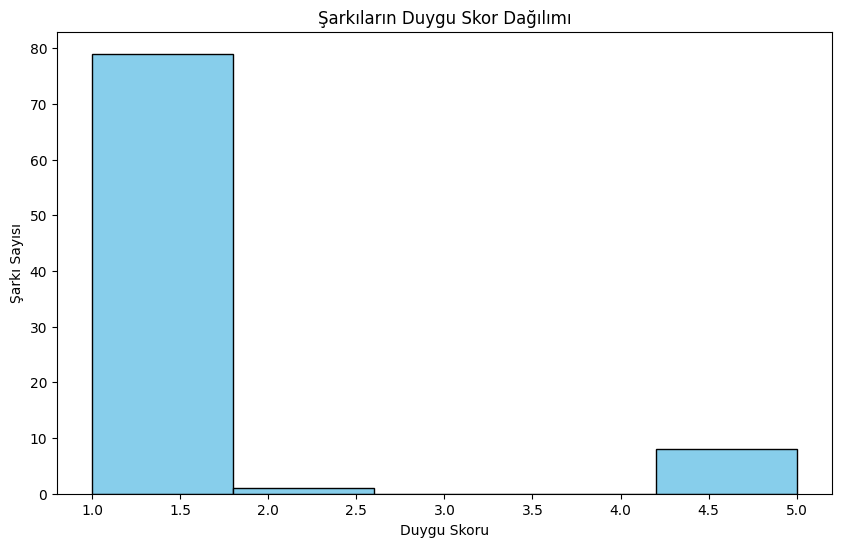

En Pozitif Şarkılar:
            Song Name  Sentiment Score
19           "Üzülme"                5
40        "Duyulurum"                5
44  "Sen En Güzelsin"                5
45        "Onun Yolu"                5
56  "Nöbetçi Geceler"                5
64         "Aşk Diye"                5
65          "Benimki"                5
75         "İstanbul"                5

En Negatif Şarkılar:
                     Song Name  Sentiment Score
0    "Zalim (Ellerine Sağlık)"                1
1                  "Sonsuz Ol"                1
2                     "Değmez"                1
3                      "Sahte"                1
4                   "Günaydın"                1
..                         ...              ...
83              "Sensiz Olmaz"                1
84  "Ver O Zaman Gömleklerimi"                1
85                  "Ya Sabır"                1
86                  "Yaz Gülü"                1
87                   "Yeniden"                1

[79 rows x 2 columns]


In [14]:
# Gerekli kütüphaneleri yükleyin
!pip install transformers torch pandas matplotlib

from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# song_lyrics_formatted.csv dosyasını oku
df_songs = pd.read_csv("song_lyrics_formatted.csv")  # Colab’e yüklediğiniz dosyanın adı

# Duygu analizi için çok dilli model yükle
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 512 token sınırını aşan şarkı sözlerini kesmek için duygu analizi fonksiyonu
def get_sentiment_score(text):
    truncated_text = text[:512]  # Şarkı sözünü 512 karakter ile sınırlandır
    result = sentiment_model(truncated_text)[0]
    label = result['label']
    score = int(label.split()[0])  # Puanı al
    return score

# Her şarkı için duygu skorunu hesaplayın
df_songs['Sentiment Score'] = df_songs['Formatted Lyrics'].apply(get_sentiment_score)

# Ortalama duygu skorunu hesaplayın ve genel dağılımı inceleyin
average_sentiment = df_songs['Sentiment Score'].mean()
print(f"Ortalama Duygu Skoru: {average_sentiment}")

# Duygu skorlarını görselleştirin
plt.figure(figsize=(10, 6))
plt.hist(df_songs['Sentiment Score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Şarkıların Duygu Skor Dağılımı')
plt.xlabel('Duygu Skoru')
plt.ylabel('Şarkı Sayısı')
plt.show()

# En pozitif ve en negatif şarkıları belirleyin
most_positive = df_songs[df_songs['Sentiment Score'] == df_songs['Sentiment Score'].max()]
most_negative = df_songs[df_songs['Sentiment Score'] == df_songs['Sentiment Score'].min()]

print("En Pozitif Şarkılar:")
print(most_positive[['Song Name', 'Sentiment Score']])

print("\nEn Negatif Şarkılar:")
print(most_negative[['Song Name', 'Sentiment Score']])


Şarkıların benzerlik analizi

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF matrisini oluştur
tfidf_vectorizer = TfidfVectorizer(stop_words=turkish_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_songs['Formatted Lyrics'])

# Benzerlik matrisini hesaplayın
cosine_sim = cosine_similarity(tfidf_matrix)

# En benzer şarkıları bulma
def find_most_similar(song_index, cosine_sim=cosine_sim):
    similarity_scores = list(enumerate(cosine_sim[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    most_similar = [i[0] for i in similarity_scores[1:6]]  # İlk 5 en benzer şarkı
    return df_songs.iloc[most_similar][['Song Name', 'Formatted Lyrics']]

# Örneğin ilk şarkıya en benzer olanları bul
most_similar_songs = find_most_similar(0)
print("En Benzer Şarkılar:")
print(most_similar_songs)


En Benzer Şarkılar:
                 Song Name                                   Formatted Lyrics
87               "Yeniden"  Yeniden yandı tüm ışıklar\nYeniden nasıl parlı...
54   "Kader Ne Söylüyorsa"  Üzülür müyüm\nİncinir miyim\nBi düşün yanıbaşı...
82  "Sensiz Ben Ne Olayım"  İki mevsim bekledim seni\nSen diyorsun "İki da...
47               "Aslında"  Aslında sen çok uzaklarda durduğumdan mıdır\nG...
61            "Sabır Taşı"  Bi başlasam anlatmaya\nYol olur burdan uzaya\n...


Benzerlik analizi detay ve görselleştirme

En Benzer Şarkılar ve Ortak Anahtar Kelimeler:
                Song Name                                   Formatted Lyrics
45            "Onun Yolu"  O bu yolu daha yürüyecek çok\nKalbini doldurac...
87              "Yeniden"  Yeniden yandı tüm ışıklar\nYeniden nasıl parlı...
54  "Kader Ne Söylüyorsa"  Üzülür müyüm\nİncinir miyim\nBi düşün yanıbaşı...
Ortak Anahtar Kelimeler: {'yalan', 'onu', 'ne', 'senin', 'hadi', 'yeniden'}


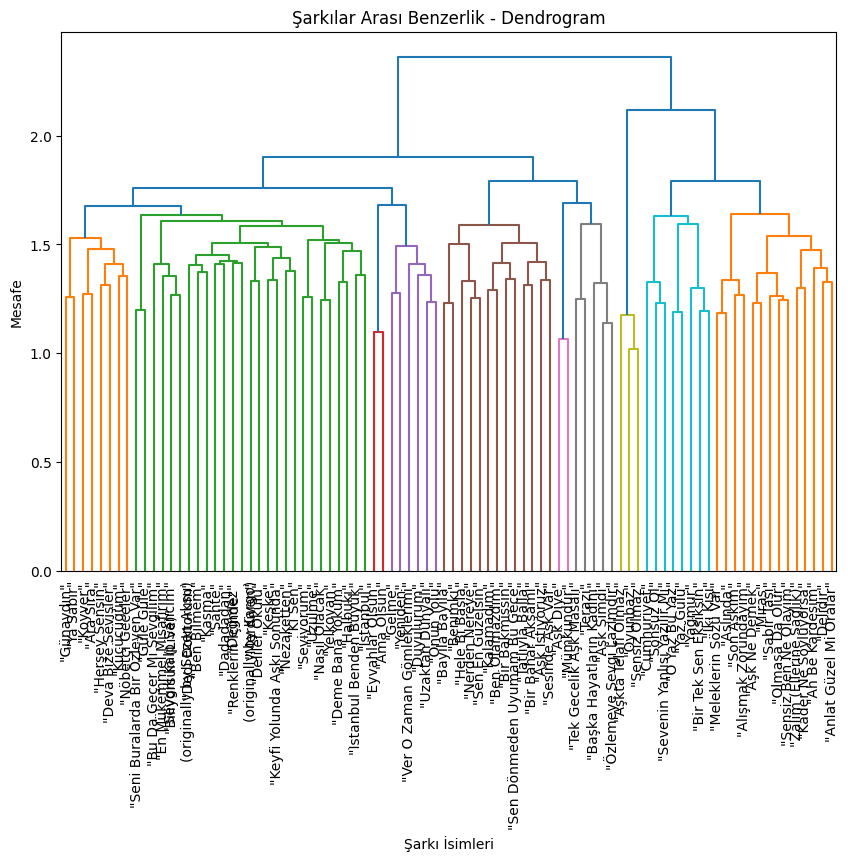

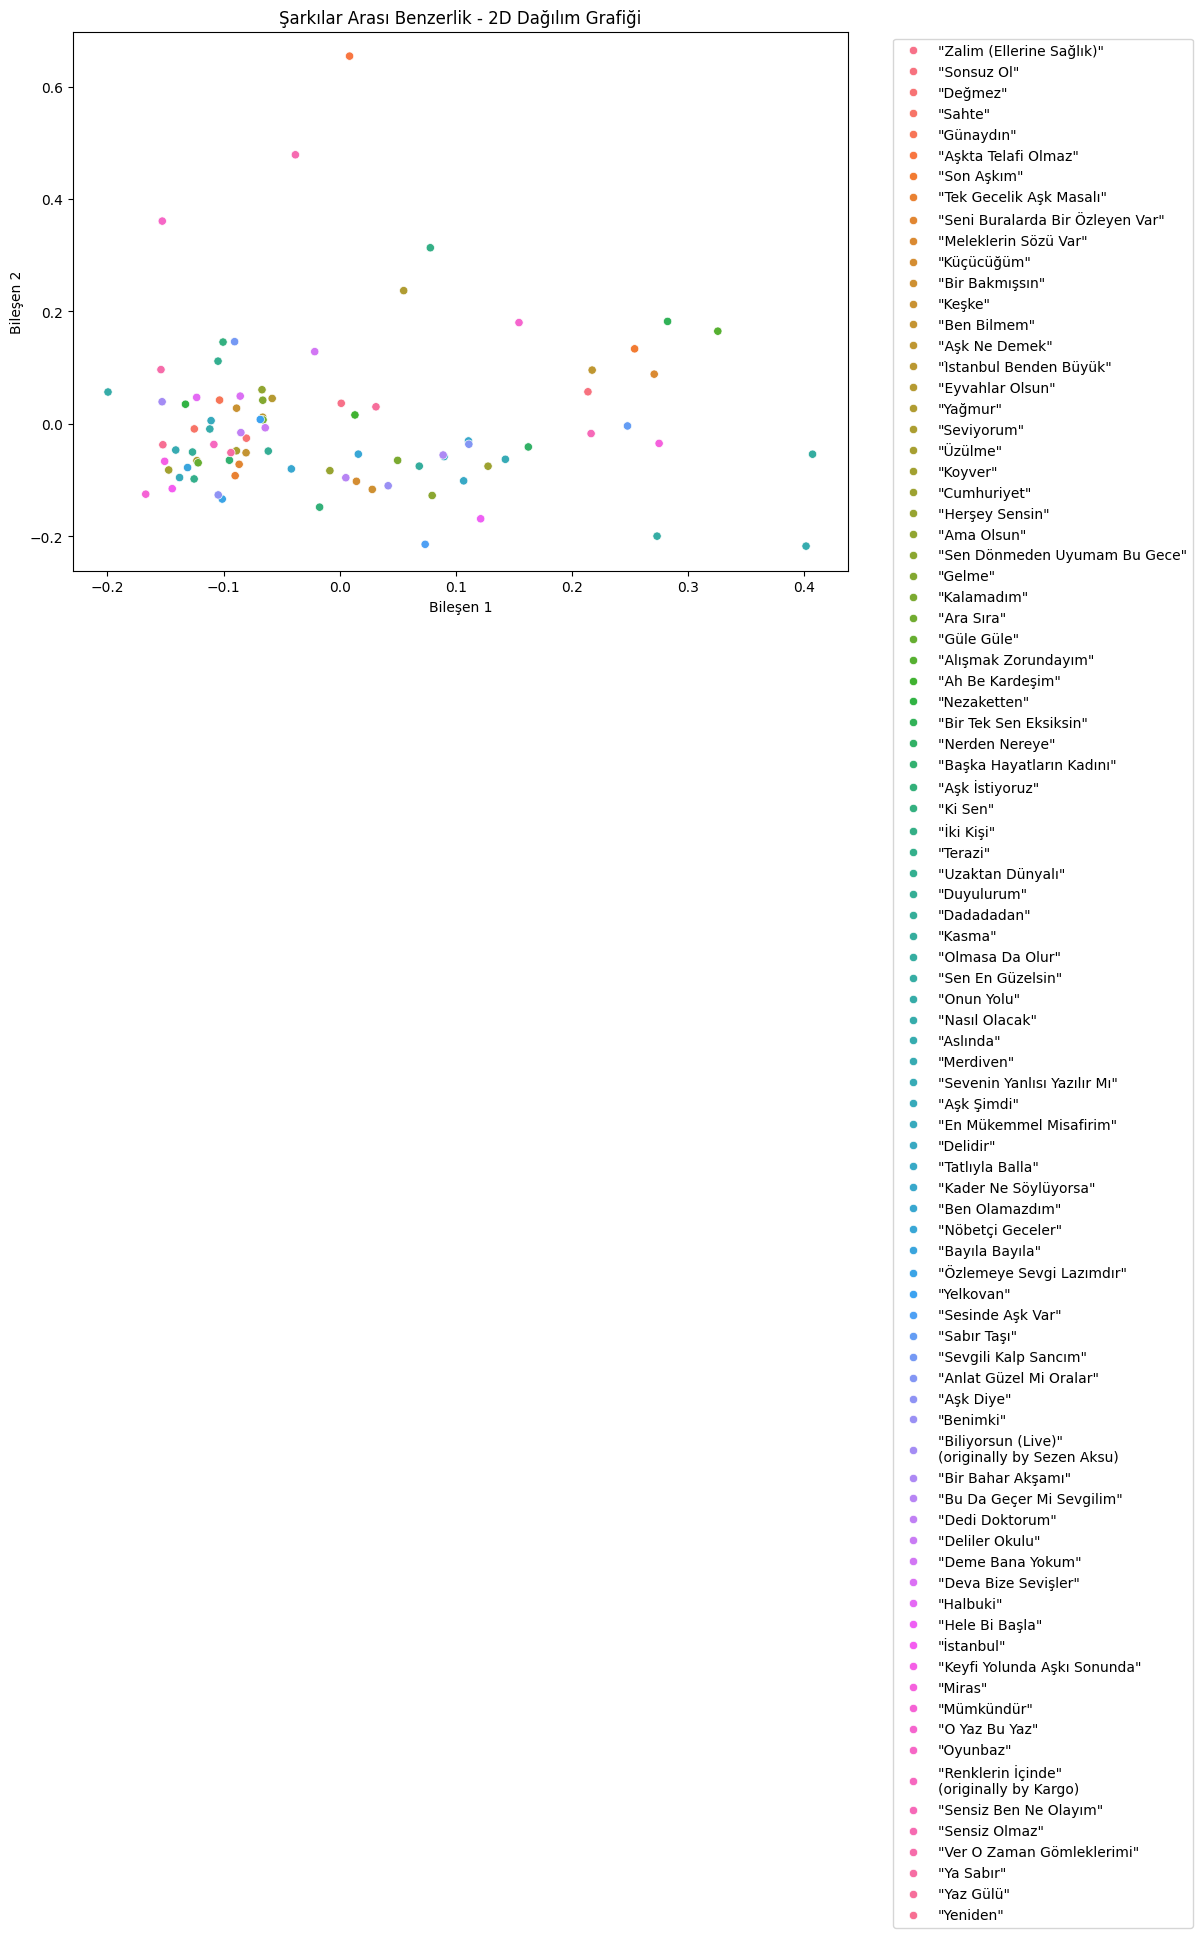

In [18]:
# Gerekli kütüphaneleri yükleyin
!pip install scikit-learn matplotlib seaborn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını okuyun
df_songs = pd.read_csv("song_lyrics_formatted.csv")

# Türkçe stop words listesi
turkish_stop_words = ['bir', 've', 'ile', 'bu', 'için', 'de', 'ama', 'çok', 'da', 'ki']

# TF-IDF matrisini oluştur
tfidf_vectorizer = TfidfVectorizer(stop_words=turkish_stop_words, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_songs['Formatted Lyrics'])

# Benzerlik matrisini hesaplayın
cosine_sim = cosine_similarity(tfidf_matrix)

# En benzer şarkıları belirleme ve ortak kelimeleri bulma
def find_most_similar(song_index, cosine_sim=cosine_sim, top_n=3):
    similarity_scores = list(enumerate(cosine_sim[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    most_similar = [i[0] for i in similarity_scores[1:top_n + 1]]
    similar_songs = df_songs.iloc[most_similar][['Song Name', 'Formatted Lyrics']]

    # Ortak anahtar kelimeleri bulma
    feature_names = tfidf_vectorizer.get_feature_names_out()
    common_keywords = []
    for idx in most_similar:
        feature_idx = tfidf_matrix[song_index].multiply(tfidf_matrix[idx]).nonzero()[1]
        common_keywords.extend([feature_names[i] for i in feature_idx])
    common_keywords = set(common_keywords)

    return similar_songs, common_keywords

# Örneğin ilk şarkıya en benzer olanları bulun
most_similar_songs, common_keywords = find_most_similar(0)
print("En Benzer Şarkılar ve Ortak Anahtar Kelimeler:")
print(most_similar_songs)
print(f"Ortak Anahtar Kelimeler: {common_keywords}")

# Dendrogram ile Şarkı Benzerlikleri Görselleştirme
linked = linkage(1 - cosine_sim, 'ward')  # 1 - cosine similarity ile mesafe matrisi

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df_songs['Song Name'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Şarkılar Arası Benzerlik - Dendrogram")
plt.xlabel("Şarkı İsimleri")
plt.ylabel("Mesafe")
plt.show()

# 2D dağılım grafiği ile şarkı benzerlikleri
from sklearn.decomposition import PCA

# TF-IDF matrisini 2 boyuta indirgeme
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=df_songs['Song Name'])
plt.title("Şarkılar Arası Benzerlik - 2D Dağılım Grafiği")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Detaylı ve anlaşılabilir görsel

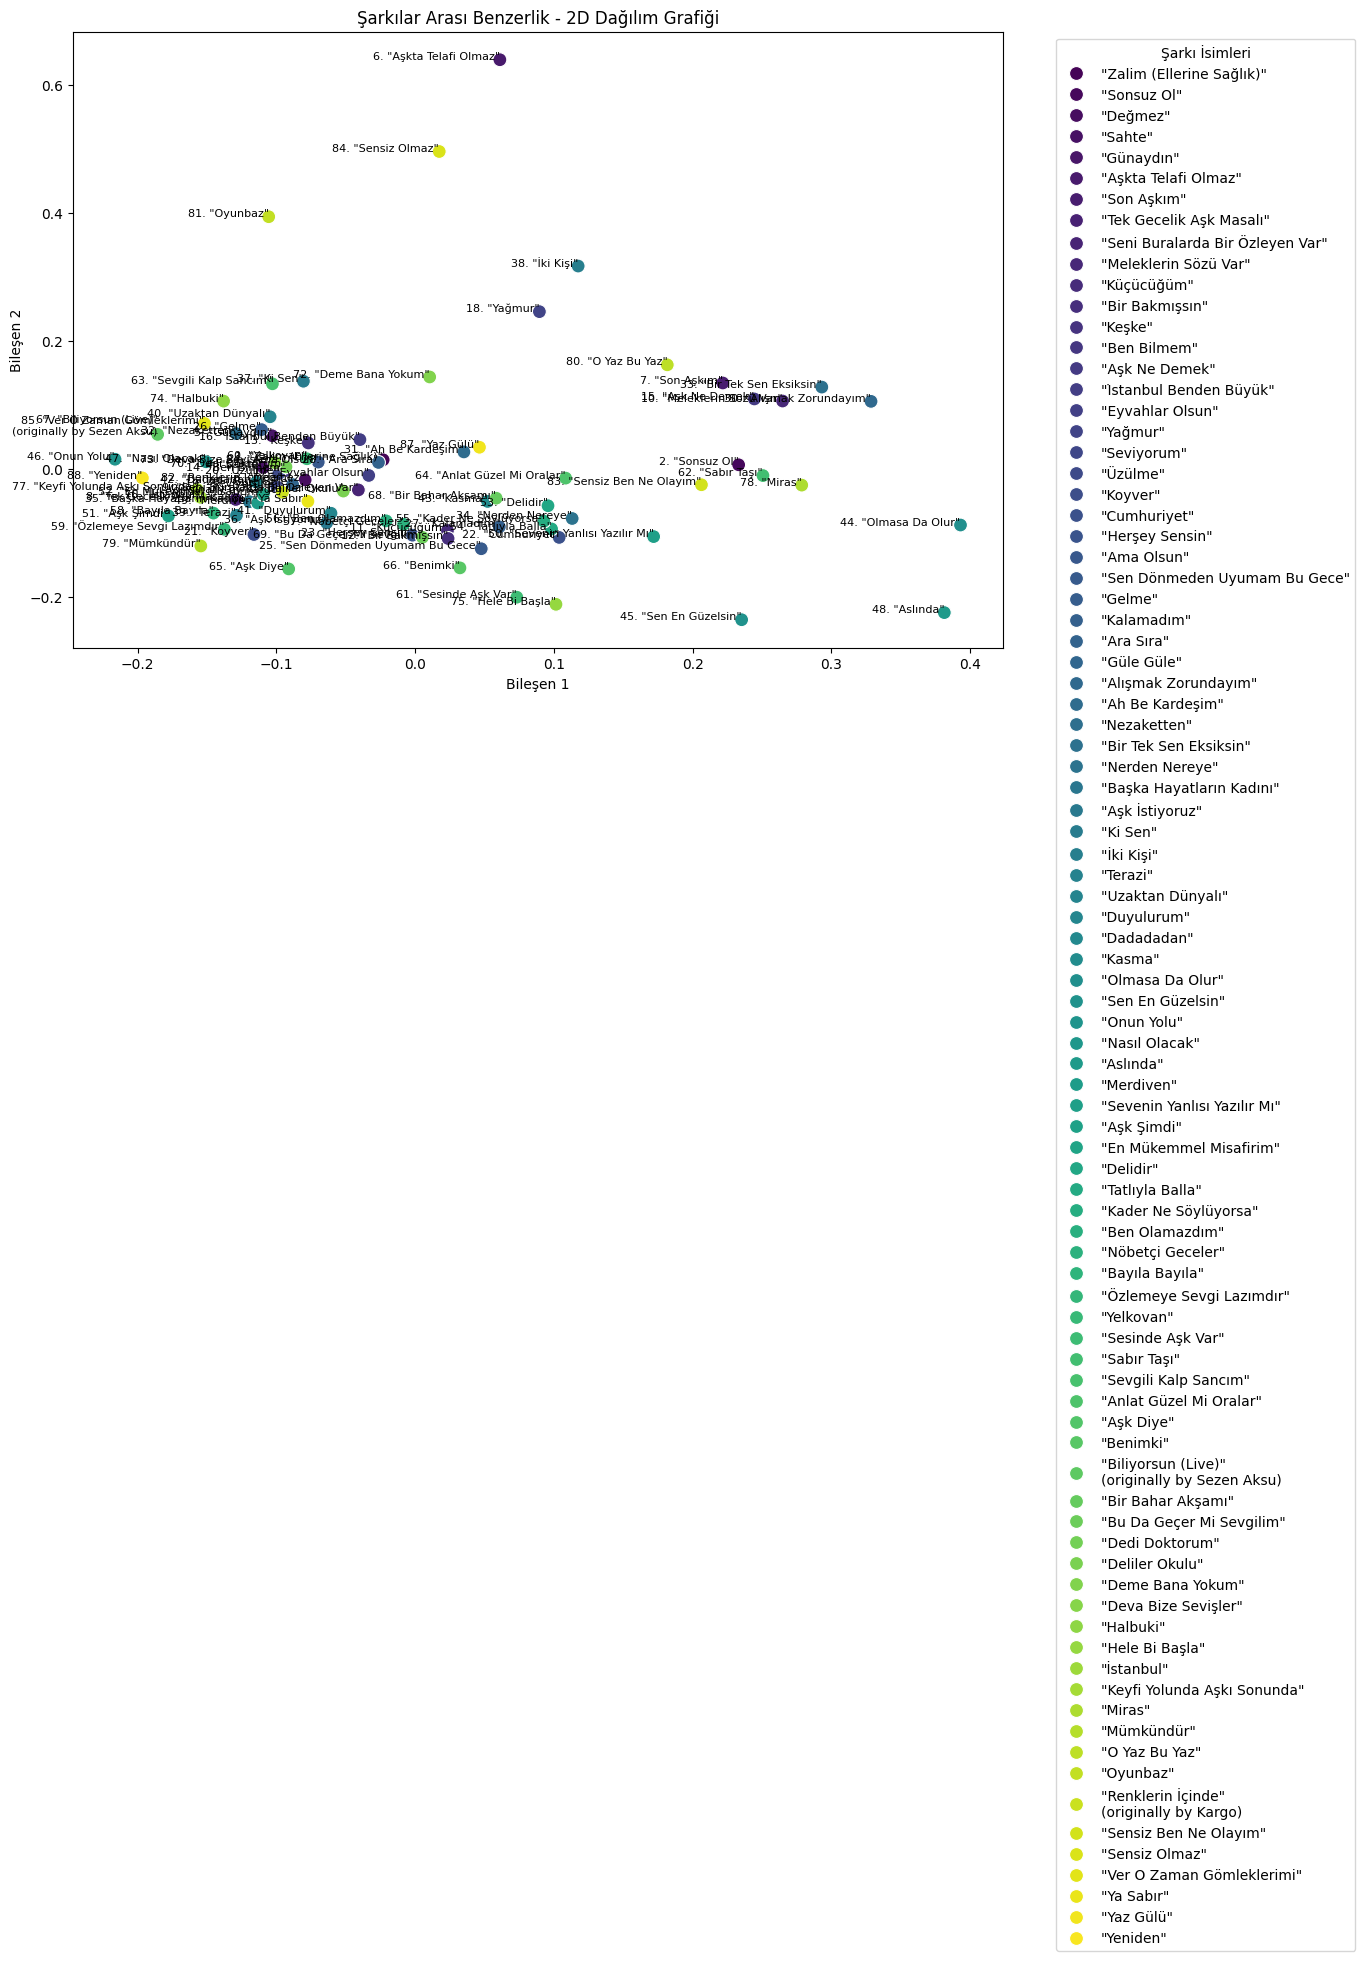

In [19]:
# Gerekli kütüphaneleri yükleyin
!pip install scikit-learn matplotlib seaborn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# CSV dosyasını okuyun
df_songs = pd.read_csv("song_lyrics_formatted.csv")

# Türkçe stop words listesi
turkish_stop_words = ['bir', 've', 'ile', 'bu', 'için', 'de', 'ama', 'çok', 'da', 'ki']

# TF-IDF matrisini oluştur
tfidf_vectorizer = TfidfVectorizer(stop_words=turkish_stop_words, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_songs['Formatted Lyrics'])

# Benzerlik matrisini hesaplayın
cosine_sim = cosine_similarity(tfidf_matrix)

# TF-IDF matrisini 2 boyuta indirgeme
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Şarkı numaralarını oluşturun
df_songs['Song Number'] = range(1, len(df_songs) + 1)

# 2D dağılım grafiği ile şarkı benzerlikleri (numara ve isim ile)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=df_songs['Song Name'], palette='viridis', s=100)

# Her noktanın yanına şarkı numarasını ve ismini ekleme
for i in range(len(df_songs)):
    plt.text(tfidf_pca[i, 0], tfidf_pca[i, 1], f"{df_songs['Song Number'][i]}. {df_songs['Song Name'][i]}",
             fontsize=8, ha='right', color='black')

plt.title("Şarkılar Arası Benzerlik - 2D Dağılım Grafiği")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Şarkı İsimleri")
plt.show()
